In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos =pd.read_csv(r"train.csv",encoding='latin-1')
#abro el data frame

In [3]:
#voy a analizar cuantos # contienen cada tweet y creo
#una serie que cuenta por cada hastag
cantidadHashtags = datos['text'].str.count('#')
cantidadHashtags.value_counts()

0     5852
1      964
2      405
3      208
4       83
5       41
6       26
10      10
7        8
8        8
13       4
11       2
9        2
Name: text, dtype: int64

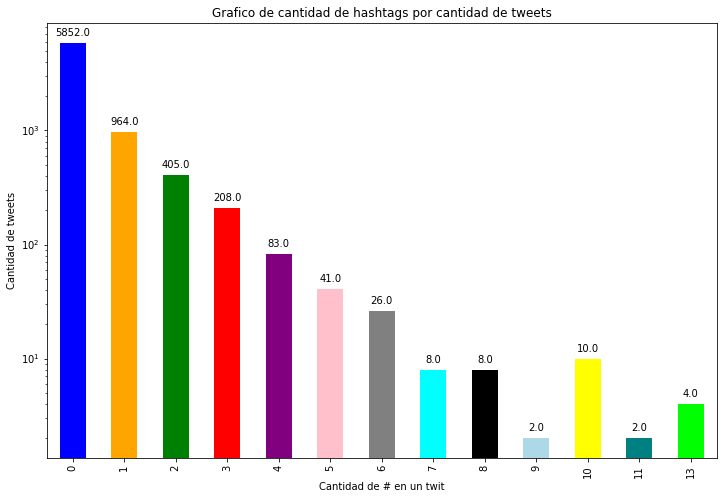

In [4]:
ax = cantidadHashtags.value_counts().sort_index().plot.bar(figsize=(12, 8),logy=True,
        color=['blue','orange','green','red','purple','pink','gray','cyan','k','lightblue','yellow','teal','lime'],title='Grafico de cantidad de hashtags por cantidad de tweets')
ax.set_xlabel('Cantidad de # en un twit')
ax.set_ylabel('Cantidad de tweets')
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("image.png")

In [5]:
cantidadHs=cantidadHashtags.to_frame()
cantidadHs['target']=datos.target

In [6]:
x = cantidadHs.groupby('text').sum()

In [7]:
x['total'] = cantidadHashtags.value_counts().sort_index()
x['tweets falsos']=x['total']-x['target']
x=x.rename(columns={'target':'tweets verdaderos'})
x

,tweets verdaderos,total,tweets falsos
text,,,
0,2396,5852,3456
1,482,964,482
2,203,405,202
3,100,208,108
4,38,83,45
5,23,41,18
6,7,26,19
7,4,8,4
8,7,8,1


Hago un drop porque considero que tweets que representan menos del 1% del total no son relevantes

In [8]:
x.drop(x[x.total < datos.target.count()*0.01].index,inplace=True)
#Example
#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)

,tweets verdaderos,total,tweets falsos
text,,,
0,2396,5852,3456
1,482,964,482
2,203,405,202
3,100,208,108
4,38,83,45
